In [6]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

test = pd.read_csv('test.csv')
training = pd.read_csv('train.csv')
training.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


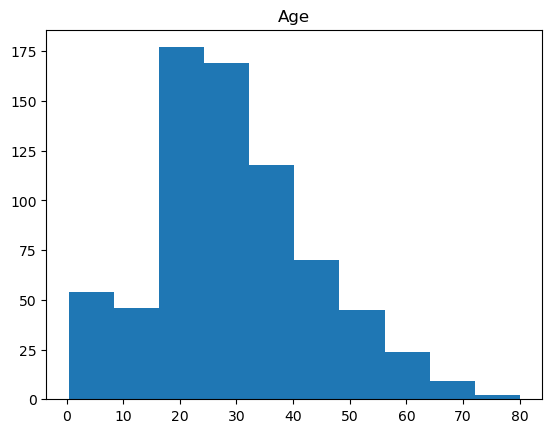

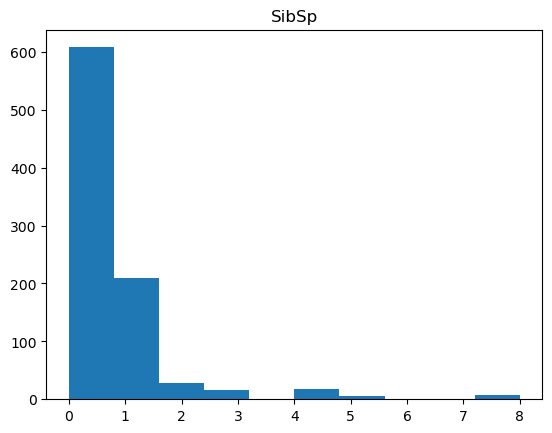

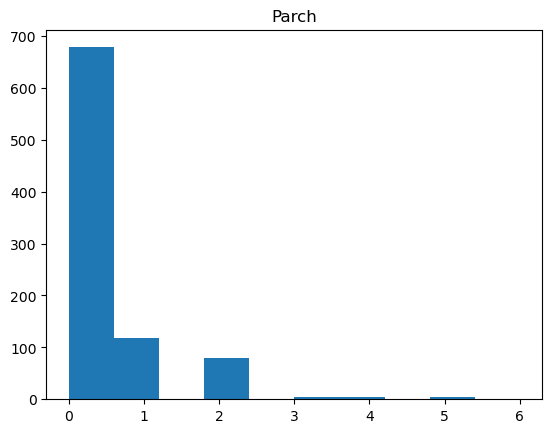

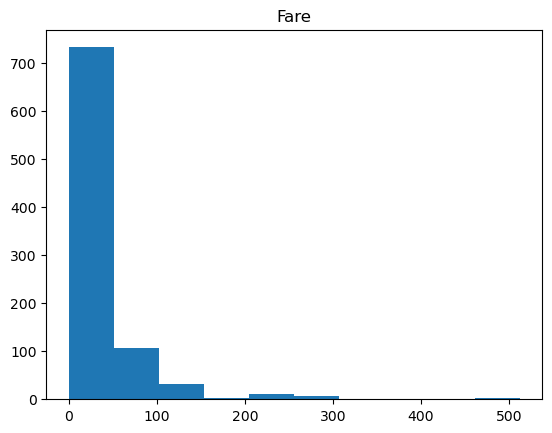

In [7]:
import matplotlib.pyplot as plt # graphs

df_num = training[['Age', 'SibSp', 'Parch', 'Fare']] # All numeric data
df_cat = training[['PassengerId', 'Survived', 'Pclass', 'Sex', 'Ticket', 'Embarked']] # All categorical data 

for i in df_num.columns:
    plt.hist(df_num[i])
    plt.title(i)
    plt.show()

In [8]:
training = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
test_ids = test['PassengerId']

def clean(data):
    data = data.drop(['Ticket', 'Cabin', 'Name', 'PassengerId'], axis=1)
    cols = ['SibSp', 'Parch', 'Fare', 'Age']

    for col in cols:
        data[col].fillna(data[col].median(), inplace=True)

    data.Embarked.fillna('U', inplace=True)
    return data

training = clean(training)
test = clean(test)

training.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [9]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
cols = ['Sex', 'Embarked']

for col in cols:
    training[col] = le.fit_transform(training[col])
    test[col] = le.fit_transform(test[col])
    print(le.classes_)

training.head(5)

['female' 'male']
['C' 'Q' 'S']


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Dense
from tensorflow.keras.utils import to_categorical

from sklearn.model_selection import train_test_split


y = training['Survived']
X = training.drop('Survived', axis=1)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

clf = LogisticRegression(random_state=0, max_iter=1000).fit(X_train, y_train)
predictions = clf.predict(X_val)

accuracy_score(y_val, predictions)

0.8100558659217877

In [11]:
submission_pred = clf.predict(test)

In [12]:
df = pd.DataFrame({'PassengerId':test_ids.values,
                   'Survived':submission_pred
                   })

In [13]:
df.to_csv('submissions.csv', index=False)